In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal, norm

# Sampling strategies

How do we sample from a joint distribution $p(\bf{x})$. This notebook introduces several sampling strategies that are widely used accross statistical models such as those implemented by Deep Generative Models.


We will illustrate sampling strategies by sampling from a two dimensional Gaussian distribution $p(x_1,x_2)$. A Gaussian distribution is parameterized through a mean vector $\boldsymbol{\mu}$ and a covariance matrix $\bf{K}=\bf{L}\bf{L}^T$, where $\bf{L}$ is the Cholesky factorization.

We will be generating samples from this Gaussian distribution using different sampling strategies.

In [3]:
# Mean
mu = np.array([0, 0]) 

# Covariance
cov = np.array(
                [[1.0, 0.8],
                [0.8, 1.0]]
              )

# Number of samples1
n_samples = 500

# Sampling
samples = np.random.multivariate_normal(mu, cov, n_samples)

# Grid for density evaluation
x = np.linspace(-4, 4, 100)
y = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))

# density
rv = multivariate_normal(mu, cov)
Z = rv.pdf(pos)

# Graficar puntos
plt.figure(figsize=(6,6))
plt.plot(samples[:,0], samples[:,1], 'x', color='skyblue', alpha=0.2)

# Graficar curvas de nivel
plt.contour(X, Y, Z, levels=6, colors='skyblue', linewidths=1)

plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.axis('equal')
plt.grid(True)
plt.show()

## Direct Sampling

Direct sampling refers to methods that directly draw a sample from the joint distribution. Usually, this is achieved either by computer algorithms or by transforming samples from a Uniform distribution, and transforming them using some transformation $f()$.

It turns out that one can draw a sample $\bf{u}$ from a two dimensional Uniform distribution, then transform each of the samples with the inverse cumulative density function of the Gaussian distribution, to yield a sample from $\bf{v }\sim \mathcal{N}(\bf{0},\bf{I})$, and then use the transformation $f(\bf{x})=\bf{L}\bf{x}+\boldsymbol{\mu}$ to yield a sample from the target Gaussian. Thus, the whole generative procedure is:

$$
\begin{align*}
\bf{u} &\sim \text{Uniform}(\bf{u})\\
\bf{v} &= \text{ICDF}_{\mathcal{N}(0,1)}(\bf{u})\\
\bf{x} &= \bf{L}\bf{v} + \boldsymbol{\mu}
\end{align*}
$$


In [4]:
%matplotlib tk
try:
    plt.close("all")
except:
    pass

## =====================
## Generate basic figure
## =====================

# Mean
mu = np.array([0,0]) 

# Covariance
cov = np.array(
                [[1.0, 0.8],
                [0.8, 1.0]]
              )
L = np.linalg.cholesky(cov)

# Number of samples1
n_samples = 500

# Sampling
samples = np.random.multivariate_normal(mu, cov, n_samples)

# Grid for density evaluation
x = np.linspace(-4, 4, 100)
y = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))

# density
rv = multivariate_normal(mu, cov)
Z = rv.pdf(pos)

# Graficar puntos
plt.figure(figsize=(6,6))
plt.plot(samples[:,0], samples[:,1], 'x', color='skyblue', alpha=0.2)

# Graficar curvas de nivel
plt.contour(X, Y, Z, levels=6, colors='skyblue', linewidths=1)

plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.axis('equal')
plt.title("Direct Sampling")
plt.grid(True)
plt.show()

## ===============
## Direct sampling
n_samples = 20

# into column vector
mu = np.reshape(mu,(2,1))

for s in range(n_samples):

    # Sample from uniform distribution
    u = np.random.rand(2, 1)

    # Transform into N(v|0,I)
    v = norm.ppf(u)  

    # Map to Gaussian
    sample = L @ v   + mu  

    # Plot Sample
    plt.plot(sample[0],sample[1],'o', color = 'C1')
    plt.pause(0.2)
    

%matplotlib inline

In [5]:
try:
    plt.close("all")
except:
    pass

## Ancestral Sampling

Ancestral sampling is a method design to sample from joint distributions where the dependency between random variables is given. IN other words, we sample using the structure of dependencies given by a direct probabilistic graphical model.

For any joint distribution from where the marginals are known direct sampling works by first sampling from the marginal distribution of a random variable, and then sample from the other ones given the previous value.

For a two dimensional random distribution this stands for either one of these proceedures:

\begin{align*}
x_1 &\sim p(x_1)\\
x_2 &\sim p(x_2\mid x_1)
\end{align*}

or

\begin{align*}
x_2 &\sim p(x_2)\\
x_1 &\sim p(x_1\mid x_2)
\end{align*}



In [8]:
%matplotlib tk
try:
    plt.close("all")
except:
    pass

## =====================
## Generate basic figure
## =====================

# Mean
mu = np.array([0,0]) 

# Covariance
cov = np.array(
                [[0.5, 0.3],
                [0.3, 0.5]]
              )
L = np.linalg.cholesky(cov)

# Number of samples1
n_samples = 500

# Sampling
samples = np.random.multivariate_normal(mu, cov, n_samples)

# Grid for density evaluation
inf_x1 = -2.5
sup_x1 = 2.5
inf_x2 = -2.5
sup_x2 = 2.5
x = np.linspace(inf_x1, sup_x1, 100)
y = np.linspace(inf_x2, sup_x2, 100)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))

# density
rv = multivariate_normal(mu, cov)
Z = rv.pdf(pos)

# Graficar puntos
plt.figure(figsize=(6,6))
plt.plot(samples[:,0], samples[:,1], 'x', color='skyblue', alpha=0.2)

# Graficar curvas de nivel
plt.contour(X, Y, Z, levels=6, colors='skyblue', linewidths=1)

plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.axis('equal')
plt.title("Ancestral Sampling")
plt.grid(True, zorder=-5)

plt.ylim([inf_x1-0.1, sup_x1])

## =============================
## Parameters from the marginal distribution
m1 = 0
m2 = 0
s11 = cov[0,0]
std11 = np.sqrt(s11)
s22 = cov[1,1]
std22 = np.sqrt(s22)
s12 = cov[0,1]
s21 = cov[1,0]


## =============================
## First order: sample x_1 first
## p(x1) = N(x1 | m1, s11)
## p(x2|x1) = N(x2 | m2 + s21 s11^{-1}(x1 - m1), s22 - s21 s11^{-1} s12 )
x1_grid = np.linspace( inf_x1, sup_x1, 100 )
s_2given1 = s22 - s21 * 1/s11*s12 
std_2given1 = np.sqrt(s_2given1)

## =============================
## Second order: sample x_2 first
## p(x2) = N(x2 | m2, s22)
## p(x1|x2) = N(x1 | m1 + s12 s22^{-1}(x2 - m2), s11 - s12 s22^{-1} s21 )
x2_grid = np.linspace( inf_x2, sup_x2, 100 )
s_1given2 = s11 - s12 * 1/s22*s21
std_1given2 = np.sqrt(s_1given2)

## ===================================
## Ancestral sampling, sample first x1
n_samples = 10

for s in range(n_samples):

    # Plot marginal distribution p(x1)
    p_x1 = norm.pdf(x1_grid, loc=m1, scale=std11)
    line_px1, = plt.plot(x1_grid, p_x1+inf_x1, '-', color='C0')  
    plt.pause(0.5)
    
    # Sample from p(x1)
    x1 = np.random.randn(1, 1)*std11 + m1

    # Plot vertical line where sample is drawn
    density_x1 = np.squeeze(norm.pdf(x1, loc=m1, scale=std11))
    _x1 = np.squeeze(x1)
    line_vx1, = plt.plot([_x1, _x1], [inf_x1, density_x1+inf_x1],
                         '--', color='C0', lw=2) 
    plt.pause(0.5)

    # Plot sample
    point_x1, = plt.plot(_x1, inf_x1, 'x', color='C0', zorder=10)   
    plt.pause(0.5)

    ## Sample from p(x2|x1)
    m21 = m2 + s21*1/s11*(x1-m1)
    x2 = np.random.randn(1,1)*std_2given1 + m21

    # Plot conditional distribution p(x2|x1)
    p_x2givenx1 = np.squeeze(norm.pdf(x2_grid, loc=m21, scale=std_2given1))
    line_px2, = plt.plot(_x1 + p_x2givenx1, x2_grid, '-', color='C1')  
    plt.pause(0.5)

    # Plot vertical line where sample is drawn
    density_x2 = np.squeeze(norm.pdf(x2, loc=m21, scale=std_2given1))
    _x2 = np.squeeze(x2)
    line_hx2, = plt.plot([_x1 , _x1 + density_x2],[_x2, _x2],
                         '--', color='C1', lw=2) 
    plt.pause(0.5)

    # Plot x2 Sample
    final_point, = plt.plot(_x1, _x2, 'x', color='C1')
    plt.pause(0.5)

    # Remove intermediate distributions
    line_px1.remove()
    line_vx1.remove()
    point_x1.remove()
    line_px2.remove()
    line_hx2.remove()
    final_point.remove()

    # Plot the sample
    plt.plot(_x1, _x2, '*', markersize = 10, color='C3')
    plt.pause(0.5)


## ===================================
## Ancestral sampling, sample first x2
n_samples = 10

for s in range(n_samples):

    # Plot marginal distribution p(x2)
    p_x2 = norm.pdf(x2_grid, loc=m2, scale=std22)
    line_px2, = plt.plot(p_x2 + inf_x2, x2_grid, '-', color='C1')
    plt.pause(0.5)
    
    # Sample from p(x2)
    x2 = np.random.randn(1, 1)*std22 + m2

    # Plot horizontal line where sample is drawn
    density_x2 = np.squeeze(norm.pdf(x2, loc=m2, scale=std22))
    _x2 = np.squeeze(x2)
    line_hx2, = plt.plot([inf_x2, inf_x2 + density_x2],
                         [_x2, _x2],
                         '--', color='C1', lw=2)
    plt.pause(0.5)

    # Plot sample
    point_x2, = plt.plot(inf_x2, _x2, 'x', color='C1', zorder=10)
    plt.pause(0.5)

    ## Sample from p(x1|x2)
    m12 = m1 + s12*1/s22*(x2-m2)
    x1 = np.random.randn(1,1)*std_1given2 + m12

    # Plot conditional distribution p(x1|x2)
    p_x1givenx2 = np.squeeze(norm.pdf(x1_grid, loc=m12, scale=std_1given2))
    _x1 = np.squeeze(x1)
    line_px1, = plt.plot(x1_grid, _x2 + p_x1givenx2, '-', color='C0')
    plt.pause(0.5)

    # Plot vertical line where sample is drawn
    density_x1 = np.squeeze(norm.pdf(x1, loc=m12, scale=std_1given2))
    line_vx1, = plt.plot([_x1, _x1],
                         [_x2, _x2 + density_x1],
                         '--', color='C0', lw=2)
    plt.pause(0.5)

    # Plot x1 Sample
    final_point, = plt.plot(_x1, _x2, 'x', color='C0')
    plt.pause(0.5)

    # Remove intermediate distributions
    line_px2.remove()
    line_hx2.remove()
    point_x2.remove()
    line_px1.remove()
    line_vx1.remove()
    final_point.remove()

    # Plot the sample
    plt.plot(_x1, _x2, 'o', markersize=10, color='C3')
    plt.pause(0.5)

%matplotlib inline

In [9]:
try:
    plt.close("all")
except:
    pass

## Markov Chain Monte Carlo

Markov Chain Monte Carlo is a set of algorithms designed to draw samples from a distribution without needing access to the complete probability distribution. In other words, if we know some aspects from the distribution, such as its gradient or its un-normalized density, then we can draw samples.

The idea of MCMC is to create a Markov Chain that asymptotically converges to states that represent samples from the target posterior distribution. In other words, the stationary distribution from the Markov Chain is the target distribution from where we want to sample.

The idea of MCMC is to start randomly at any point $x_0$ and then draw a sample from a proposal distribution $q(x_t\mid x_{t-1})$ conditioned on $x_0$. This produces a candidate state $x_1$. This candidate state is accepted with probability:

$$
\alpha = \min\left(1,\frac{\pi(x_t)q(x_{t-1}\mid x_t)}{\pi(x_{t-1})q(x_{t}\mid x_{t-1})}\right)
$$


where $\pi(x)$ is the unnormalized density, and $q(x_{t}\mid x_{t-1})$ is the proposal distribution. Importantly, sometimes we do not have access to $\pi(x)$ so we cannot calculate the accept ratio and thus the algorithm draw biased samples. This happens, for example, in score-based generative models. On the other hand, if the proposal distribution $q(x_{t}\mid x_{t-1})$ is symmetric, for example if we use a Gaussian distribution, then we do not need to compute its density in the ratio.
 

### Gibbs Sampling

Gibbs sampling is an MCMC algorithm that alternative samples from the conditional distributions to create the Markov Chain. Importantly, $\alpha$ is always $1$ so samples are always accepted. 

In [12]:
%matplotlib tk
try:
    plt.close("all")
except:
    pass

## =====================
## Generate basic figure
## =====================

# Mean
mu = np.array([0,0]) 

# Covariance
cov = np.array(
                [[0.5, 0.3],
                [0.3, 0.5]]
              )
L = np.linalg.cholesky(cov)

# Number of samples1
n_samples = 500

# Sampling
samples = np.random.multivariate_normal(mu, cov, n_samples)

# Grid for density evaluation
inf_x1 = -2.5
sup_x1 = 2.5
inf_x2 = -2.5
sup_x2 = 2.5
x = np.linspace(inf_x1, sup_x1, 100)
y = np.linspace(inf_x2, sup_x2, 100)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))

# density
rv = multivariate_normal(mu, cov)
Z = rv.pdf(pos)

# Graficar puntos
plt.figure(figsize=(6,6))
plt.plot(samples[:,0], samples[:,1], 'x', color='skyblue', alpha=0.2)

# Graficar curvas de nivel
plt.contour(X, Y, Z, levels=6, colors='skyblue', linewidths=1)

plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.axis('equal')
plt.title("Gibbs Sampling")
plt.grid(True, zorder=-5)

## =============================
## Parameters from the marginal distribution
m1 = 0
m2 = 0
s11 = cov[0,0]
std11 = np.sqrt(s11)
s22 = cov[1,1]
std22 = np.sqrt(s22)
s12 = cov[0,1]
s21 = cov[1,0]

## =============================
## First order: sample x_1 first
## p(x1) = N(x1 | m1, s11)
## p(x2|x1) = N(x2 | m2 + s21 s11^{-1}(x1 - m1), s22 - s21 s11^{-1} s12 )
x1_grid = np.linspace( inf_x1, sup_x1, 100 )
s_2given1 = s22 - s21 * 1/s11*s12 
std_2given1 = np.sqrt(s_2given1)

## =============================
## Second order: sample x_2 first
## p(x2) = N(x2 | m2, s22)
## p(x1|x2) = N(x1 | m1 + s12 s22^{-1}(x2 - m2), s11 - s12 s22^{-1} s21 )
x2_grid = np.linspace( inf_x2, sup_x2, 100 )
s_1given2 = s11 - s12 * 1/s22*s21
std_1given2 = np.sqrt(s_1given2)


## ===================================================================
## ==================================================================
## Gibbs sampling, alternate sampling from conditional distributions 
np.random.seed(1)
n_chains = 5
for chain_idx in range(n_chains):

    # initialize the state with a big variance.
    initial_state = np.random.randn(2,1)*np.sqrt(3)

    # Initial state
    _x1 = initial_state[0,0]
    _x2 = initial_state[1,0]

    # Plot initial point
    init_state, = plt.plot(_x1, _x2, 'x', markersize=10, color='black')
    plt.pause(0.2)

    # Variables to store the trajectory for plotting the trail
    traj_x = [_x1]
    traj_y = [_x2]

    mcmc_samples = 10
    for mcmc_s in range(mcmc_samples):

        # ==========================
        # Sample x2 | x1
        # ==========================
        m21 = m2 + s21*1/s11*(_x1 - m1)
        _x2 = np.random.randn()*std_2given1 + m21

        # Plot conditional distribution p(x2|x1)
        p_x2givenx1 = norm.pdf(x2_grid, loc=m21, scale=std_2given1)
        line_px2, = plt.plot(_x1 + p_x2givenx1, x2_grid, '-', color='C1')
        plt.pause(0.2)

        # Plot horizontal line where sample is drawn
        density_x2 = norm.pdf(_x2, loc=m21, scale=std_2given1)
        line_hx2, = plt.plot([_x1, _x1 + density_x2], [_x2, _x2], '--', color='C1', lw=2)
        plt.pause(0.2)

        # Plot sampled x2 point
        point_x2, = plt.plot(_x1, _x2, 'x', color='C1')
        plt.pause(0.2)

        # ==========================
        # Sample x1 | x2
        # ==========================
        m12 = m1 + s12*1/s22*(_x2 - m2)
        _x1 = np.random.randn()*std_1given2 + m12

        # Plot conditional distribution p(x1|x2)
        p_x1givenx2 = norm.pdf(x1_grid, loc=m12, scale=std_1given2)
        line_px1, = plt.plot(x1_grid, p_x1givenx2 + _x2, '-', color='C2')
        plt.pause(0.2)

        # Plot vertical line where sample is drawn
        density_x1 = norm.pdf(_x1, loc=m12, scale=std_1given2)
        line_hx1, = plt.plot([_x1, _x1], [_x2, _x2 + density_x1], '--', color='C2', lw=2)
        plt.pause(0.2)

        # Plot sampled x1 point
        point_x1, = plt.plot(_x1, _x2, 'x', color='C2')
        plt.pause(0.2)

        # ==========================
        # Update trajectory and plot trail
        # ==========================
        traj_x.append(_x1)
        traj_y.append(_x2)
        if mcmc_s != 0:
            plot_traj_x.remove()
        plot_traj_x, = plt.plot(traj_x, traj_y, '--x', markersize=4, color='black', alpha=0.5)  
        plt.pause(0.2)

        # ==========================
        # Remove intermediate lines and points
        # ==========================
        line_px1.remove()
        line_hx1.remove()
        point_x1.remove()
        line_px2.remove()
        line_hx2.remove()
        point_x2.remove()

    # Plot the sample
    plt.plot(_x1, _x2, 'o', markersize=10, color='C3')
    plt.pause(0.2)

    # Remove chain trajectory
    plot_traj_x.remove()
    init_state.remove()

%matplotlib inline

In [ ]:
try:
    plt.close("all")
except:
    pass

### Random Walk MCMC

Random walk MCMC is associated to a MCMC algorithm in which states are proposed randomly attending to a proposal distribution that does not take into account the geometry of the distribution.

Given a state $x_t$, a usual proposal distribution is Gaussian centered at $x_t$, with a variance parameter that is set accordingly to enhance mixing. In contrast to the Gibbs sample, we sample $x_{t+1}$ from the joint proposal distribution at once.

A good point of this proposal distribution is that, since it is symmetrical, then $\alpha$ is only computed from the un-normalized density.

$$
\alpha = \min\left(1,\frac{\pi(x_t)}{\pi(x_{t-1})}\right)
$$


In [13]:
%matplotlib tk
try:
    plt.close("all")
except:
    pass

## =====================
## Generate basic figure
## =====================

# Mean
mu = np.array([0,0]) 

# Covariance
cov = np.array(
                [[0.5, 0.3],
                [0.3, 0.5]]
              )

# Number of samples1
n_samples = 500

# Sampling
samples = np.random.multivariate_normal(mu, cov, n_samples)

# Grid for density evaluation
inf_x1 = -3.5
sup_x1 = 3.5
inf_x2 = -3.5
sup_x2 = 3.5
x = np.linspace(inf_x1, sup_x1, 100)
y = np.linspace(inf_x2, sup_x2, 100)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))

# density
rv = multivariate_normal(mu, cov)
Z = rv.pdf(pos)

# Graficar puntos
plt.figure(figsize=(6,6))
plt.plot(samples[:,0], samples[:,1], 'x', color='skyblue', alpha=0.2)

# Graficar curvas de nivel
plt.contour(X, Y, Z, levels=6, colors='skyblue', linewidths=1)

plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.axis('equal')
plt.title("Random Walk MCMC")
plt.grid(True, zorder=-5)

# ==========================
# Random Walk Metropolis MCMC
# ==========================
proposal_std = 0.3  # standard deviation of Gaussian proposal

## grid to plot proposal
cov_proposal = np.array(
                [[proposal_std**2, 0.0],
                [0.0, proposal_std**2]]
              )

np.random.seed(1)
n_chains = 10
for chain_idx in range(n_chains):

    # initialize the state with a big variance.
    current_state = np.random.randn(1,2)*np.sqrt(3)

    # Initial state
    _x1 = current_state[0,0]
    _x2 = current_state[0,1]

    # Plot initial point
    init_state, = plt.plot(_x1, _x2, 'x', markersize=10, color='black')
    plt.pause(0.5)

    # Variables to store the trajectory for plotting the trail
    traj_x = [_x1]
    traj_y = [_x2]

    mcmc_samples = 50
    for mcmc_s in range(mcmc_samples):

        ## plot proposal distribution 
        rv_prop = multivariate_normal(np.squeeze(current_state), cov_proposal)
        Z_prop = rv_prop.pdf(pos)
        # Graficar curvas de nivel
        plot_prop = plt.contour(X, Y, Z_prop, levels=6, colors='k', linewidths=1, zorder = -20, alpha = 0.6)
        plt.pause(0.1)

        # New state q(x' | x) = N(x' | x , sigma^2 I)
        proposal_state = current_state + np.random.randn(1,2) * proposal_std
        # Compute acceptance probility
        # target distribution: multivariate normal. In this case we can evaluate full density
        # but an unnormalized version is valid since normalization cancels in ratio
        log_target_current = rv.logpdf(current_state)
        log_target_proposal = rv.logpdf(proposal_state)
        alpha = np.exp(log_target_proposal - log_target_current)

        ## Plot proposed state 
        plot_prop_state, = plt.plot(proposal_state[0,0], proposal_state[0,1], '*', markersize=8, color='black')
        plt.pause(0.1)
        
        # Accept Reject step
        color = 'C3' # red
        if np.random.rand() < alpha:
            current_state = proposal_state  # accept
            color = 'C2' # green
            
        ## Plot proposed state with color accepted or not 
        plot_prop_state_color, = plt.plot(proposal_state[0,0], proposal_state[0,1], '*', markersize=8, color=color)
        plt.pause(0.1)

        # Update trajectory
        traj_x.append(current_state[0,0])
        traj_y.append(current_state[0,1])

        # Plot point and trajectory
        if mcmc_s != 0:
            plot_traj_x.remove()
        plot_traj_x, = plt.plot(traj_x, traj_y, '--x', markersize=4, color='black', alpha=0.5) 
        plt.pause(0.1)

        ## remove intermediate graphs
        plot_prop_state.remove()
        plot_prop_state_color.remove()
        plot_prop.remove()

        
    # Plot the sample
    _x1 = current_state[0,0]
    _x2 = current_state[0,1]
    plt.plot(_x1, _x2, 'o', markersize=10, color='C3')
    plt.pause(0.1)

    # Remove chain trajectory
    plot_traj_x.remove()
    init_state.remove()
    
%matplotlib inline

In [17]:
try:
    plt.close("all")
except:
    pass

### Langevin Monte Carlo 

Langevin MCMC is a Markov Chain Monte Carlo algorithm where new states are proposed by approximating the Langevin stochastic differential equation:

$$
\text{d}\bf{x_t} = \epsilon \nabla_{\bf{x}}\log p(\bf{x_t})\text{d}t + \sqrt{2\epsilon}\text{d}\bf{W}_t
$$

This SDE models the dynamics of molecular systems. Very simply, since molecular systems have some randomness associated, the paths that a particle can follow in the system can also be random. This paths are given by this stochastic differential equation. When $t\rightarrow \infty$, the probability governing the position $x_t$ of a particle is $p(x)$, since it is the stationary probability distribution.

If we now substitute this probability distribution by our target density, then we are done. We can solve the SDE, and, eventually, converge to our target distribution after some time. Importantly, we are only required with the gradient of the log probability, which has several nice properties since it does not depend on the normalizing constants. Note that:

$$
\log p(\bf{x}) = \log \frac{\tilde{p}(\bf{x})}{Z}
$$

Since $Z_\bf{x} = \int \tilde{p}(\bf{x}) d\bf{x}$ does not depend on $\bf{x}$, then:

$$
\nabla_\bf{x} \log p(\bf{x}) = \nabla_x  \log \tilde{p}(\bf{x}) - \cancelto{0}{\nabla_\bf{x} Z}
$$

So this is a good point. Since this SDE are continuous time, we use a discretization, so new states $\bf{x_t}$ are obtained through:

$$
\bf{x_{t+1}} =\bf{x_t}+ \frac{\epsilon}{2} \nabla_x \log p(\bf{x_t}) +  \sqrt{\epsilon} \bf{z_t} ;\,\, \bf{z_t} \sim \mathcal{N}(\bf{0},\bf{I})
$$

Then, when we have access to the unnormalized density (which is not always the case, as in score models), we can use a metropolis accept-reject step, with the corresponding proposal distribution which I do not write here (for the moment) because I am not going to use it.

One intuitive perspective of why do we need to add Gaussian noise into the proposal step is because otherwise the gradient will always push samples to the maximum of the density, and thus after enough time $t$ we will always be collapsing our Markov Chain to the same point, breaking detail balance. Note that we are basically doing stochastic gradient ascent on the probability density p(x).

#### Visualizing the gradients at each point

We can visualize the gradients $\nabla_{\bf{x}}\log p(\bf{x})$ at each point. Rather than using a scipy function I am going to do it manually, for illustration purposes.

Note that, for a multivariate Gaussian we have:

$$
\log p(\bf{x}) = -\frac{1}{2}({\bf x}-{\boldsymbol{\mu}})^{\top}{\bf \Sigma}^{-1}({\bf x}-{\boldsymbol{\mu}})-\frac{1}{2}\log|{\bf \Sigma}|-\frac{d}{2}\log(2\pi)
$$

The gradient w.r.t $\bf{x}$ only requires the gradient of the quadratic form. Using the fact that the covariance is symmetric we have:

$$
\nabla_{\bf{x}}\log p(\bf{x}) = -{\bf \Sigma}^{-1}({\bf x}-{\boldsymbol{\mu}})
$$

which can be easily obtained from the differential of a quadratic form: $\text{d}[\bf{x}^T\bf{A}\bf{x}]=\bf{x}^T[\bf{A}^T+\bf{A}]\text{d}\bf{x}.$

In [18]:
def nabla_log_px(x, mu, L):
    diff = x - mu  # (N, d)
    
    # Solve L y = diff^T  -> y = L^-1 (x-mu)^T
    y = np.linalg.solve(L, diff.T)
    
    # Solve L^T g = y -> g = (L^T)^-1 y
    grad = -np.linalg.solve(L.T, y).T  # (N, d)

    return grad

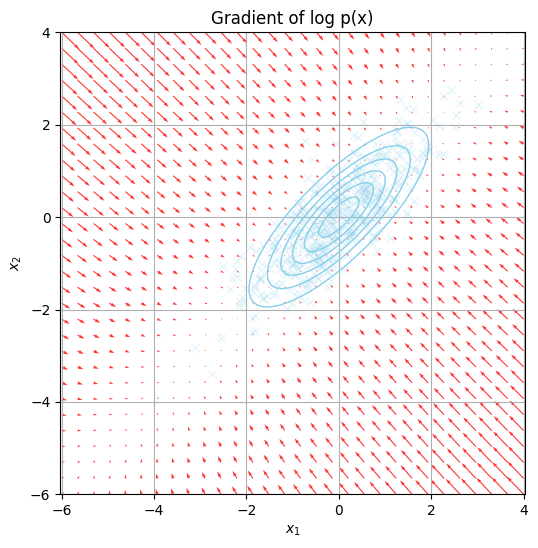

In [19]:
# Mean
mu = np.array([0, 0]) 

# Covariance
cov = np.array([[1.0, 0.8],
                [0.8, 1.0]])

# Cholesky factor
L = np.linalg.cholesky(cov)

# Number of samples
n_samples = 500

# Sampling
samples = np.random.multivariate_normal(mu, cov, n_samples)

# Grid for density evaluation
x = np.linspace(-6, 4, 100)  # fewer points for clarity in quiver
y = np.linspace(-6, 4, 100)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))

x_gr = np.linspace(-6, 4, 30)  # fewer points for clarity in quiver
y_gr = np.linspace(-6, 4, 30)
X_gr, Y_gr = np.meshgrid(x_gr, y_gr)
pos_gr = np.dstack((X_gr, Y_gr))
points_gr = pos_gr.reshape(-1, 2)  # flatten for gradient evaluation

# density
rv = multivariate_normal(mu, cov)
Z = rv.pdf(pos)

# ============================
# Compute gradient using your pre-defined function
# ============================
grad = nabla_log_px(points_gr, mu, L)  # use the function defined elsewhere
grad_x = grad[:,0].reshape(X_gr.shape)
grad_y = grad[:,1].reshape(Y_gr.shape)

# ============================
# Plot
# ============================
plt.figure(figsize=(6,6))

# scatter points
plt.plot(samples[:,0], samples[:,1], 'x', color='skyblue', alpha=0.2)

# contour
plt.contour(X, Y, Z, levels=6, colors='skyblue', linewidths=1)

# quiver for gradient
plt.quiver(X_gr, Y_gr, grad_x, grad_y, color='red', alpha=0.8)

plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.axis('equal')
plt.grid(True)
plt.title("Gradient of log p(x)")
plt.show()

#### Running Langevin MCMC

All states are accepted. For small $\epsilon$ the SDE is very well approximated although this simulation is not Volume Preserving as in Hamiltonian Monte carlo and so accept/reject state is always necessary.

In [20]:
%matplotlib tk
try:
    plt.close("all")
except:
    pass

# Mean
mu = np.array([0, 0]) 

# Covariance
cov = np.array([[1.0, 0.8],
                [0.8, 1.0]])

# Cholesky factor
L = np.linalg.cholesky(cov)

# Number of samples
n_samples = 500

# Sampling
samples = np.random.multivariate_normal(mu, cov, n_samples)

# Grid for density evaluation
x = np.linspace(-6, 4, 100)  # fewer points for clarity in quiver
y = np.linspace(-6, 4, 100)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))

x_gr = np.linspace(-6, 4, 30)  # fewer points for clarity in quiver
y_gr = np.linspace(-6, 4, 30)
X_gr, Y_gr = np.meshgrid(x_gr, y_gr)
pos_gr = np.dstack((X_gr, Y_gr))
points_gr = pos_gr.reshape(-1, 2)  # flatten for gradient evaluation

# density
rv = multivariate_normal(mu, cov)
Z = rv.pdf(pos)

# ============================
# Compute gradient using your pre-defined function
# ============================
grad = nabla_log_px(points_gr, mu, L)  
grad_x = grad[:,0].reshape(X_gr.shape)
grad_y = grad[:,1].reshape(Y_gr.shape)

# ============================
# Plot
# ============================
plt.figure(figsize=(6,6))

# scatter points
plt.plot(samples[:,0], samples[:,1], 'x', color='skyblue', alpha=0.2)

# contour
plt.contour(X, Y, Z, levels=6, colors='skyblue', linewidths=1)

# quiver for gradient
plt.quiver(X_gr, Y_gr, grad_x, grad_y, color='C2', alpha=0.9)

plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.axis('equal')
plt.grid(True)
plt.title("Langevin MCMC")
plt.show()

## ===========================
## Sampling with Lanvgein MCMC
## ===========================
eps = 0.1

np.random.seed(1)
n_chains = 10
for chain_idx in range(n_chains):

    # initialize the state with a big variance.
    current_state = np.random.randn(1,2)*np.sqrt(3)

    # Initial state
    _x1 = current_state[0,0]
    _x2 = current_state[0,1]

    # Plot initial point
    init_state, = plt.plot(_x1, _x2, 'x', markersize=10, color='black')
    plt.pause(0.5)

    # Variables to store the trajectory for plotting the trail
    traj_x = [_x1]
    traj_y = [_x2]

    mcmc_samples = 50
    for mcmc_s in range(mcmc_samples):

        current_state = current_state + eps/2. * nabla_log_px(current_state, mu, L) + np.sqrt(eps) * np.random.randn(1,2) 

        # Update trajectory
        traj_x.append(current_state[0,0])
        traj_y.append(current_state[0,1])

        # Plot point and trajectory
        if mcmc_s != 0:
            plot_traj_x.remove()
        plot_traj_x, = plt.plot(traj_x, traj_y, '--x', markersize=4, color='black', alpha=0.5) 
        plt.pause(0.5)
        
    # Plot the sample
    _x1 = current_state[0,0]
    _x2 = current_state[0,1]
    plt.plot(_x1, _x2, 'o', markersize=10, color='C3')
    plt.pause(0.5)

    # Remove chain trajectory
    plot_traj_x.remove()
    init_state.remove()

%matplotlib inline

In [21]:
try:
    plt.close("all")
except:
    pass

### Todo

* Rejection Sampling
* Importance sampling
* Hamiltonian MCMC